In [35]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
x,y=make_blobs(n_samples=90,n_features=2,centers=3)
x.shape,y.shape

((90, 2), (90,))

In [37]:
y

array([0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 0])

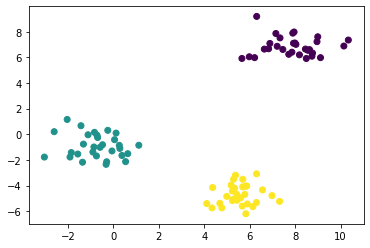

In [38]:
plt.scatter(x[:,0],x[:,1],c=y)

In [60]:
class KMeans:
    
    def __init__(self,n_clusters=5,max_iter=100):
        '''n_clusters is the no. of clusters u want
           max_iter is the max no. of iterations u want the algorithm to run for
           tolerance is the stopping condition. If for some cluster center, it's 
           value after updation differs by less than the tolerance value with it's
           value before updation, the algorithm is stopped.'''
        
        self.k=n_clusters
        self.iter=max_iter
        self.clusters={}
        
    def distance(self,x1,x2):
        '''functions to calculate distance between 2 points'''
        return (np.sum((x1-x2)**2))**0.5
    
    def assign(self,x):
        '''assigns each point to the cluster of it's nearest cluster center'''
           
        predictions=[]                                  #only for test set
        for xp in x:                                    #for each point xp in set x   
            dist=[]                                     #will store distances from each cluster center
            
            for cluster in self.clusters.values():      #calculating distance from each cluster center
                c=cluster["center"]
                dist.append(self.distance(xp,c))
            
            cno=np.argmin(dist)                         #Cluster no. to which this point(xp) wil go to
            self.clusters[cno]["points"].append(xp)     #appending xp to cluster no. cno's "points" list
            predictions.append(cno)                     #for test set only
            
        return predictions
        
    def update(self):
        '''updates cluster centers to mean of the clusters'''
        
        for cluster in self.clusters.values():
            mean=np.mean(cluster["points"],axis=0)
            cluster["center"]=mean
            cluster["points"]=[]
            
    def show(self):
        cluster_centers=[]
        cluster_colors=[]
        for cluster in self.clusters.values():
            cluster_centers.append(cluster["center"])
            cluster_colors.append(cluster["color"])

        cluster_centers=np.array(cluster_centers)
        
        plt.scatter(x[:,0],x[:,1],c=y)
        plt.scatter(cluster_centers[:,0],cluster_centers[:,1],color="blue",marker="x")
        plt.show()
            
    def fit(self,x):
        '''x is the training set'''
        
        #Step 1: initializing clusters
        for i in range(self.k):                      #for K no. of clusters
             
            points=[]                                #the points inside that cluster (initially empty)                                
            color=i                                  #color of that cluster
            center=x[10+i]                                  #center of that cluster
            
            cluster={"center":center,"points":points,"color":color}
            self.clusters[i]=cluster
                
        for i in range(self.iter):
            self.assign(x)
            self.show()
            self.update()
            
        self.assign(x)
        
        return self.clusters
    
    def predict(self,x):                      #x is the test set
        
        return self.assign(x)

In [61]:
clf=KMeans(n_clusters=3,max_iter=10)
clf

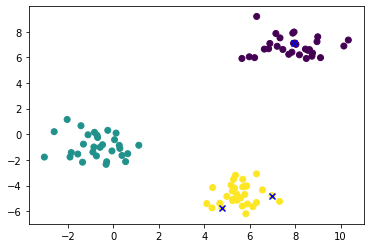

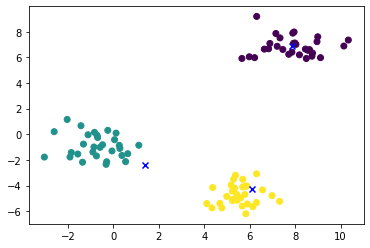

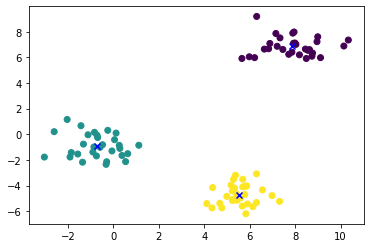

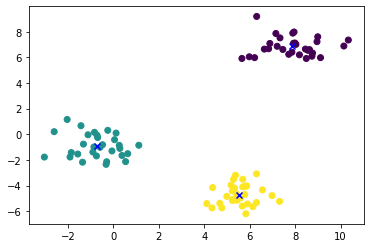

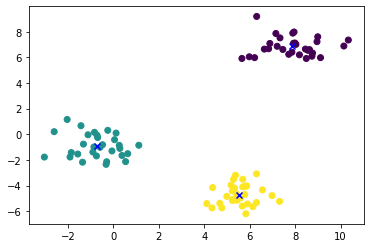

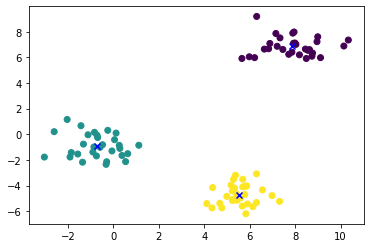

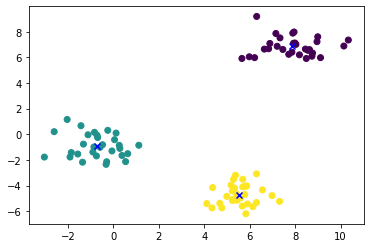

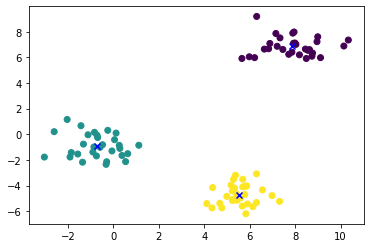

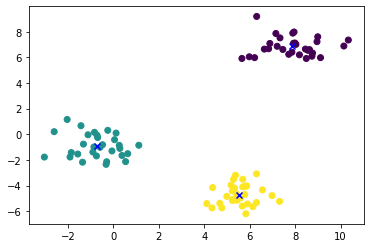

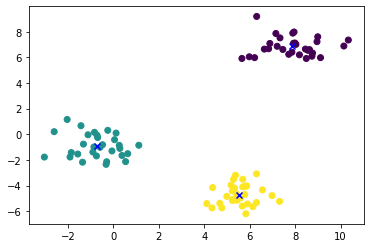

{0: {'center': array([7.88392615, 6.85353845]),
  'points': [array([7.1539596 , 7.86482909]),
   array([7.95478771, 7.98317409]),
   array([7.3361049 , 7.52182127]),
   array([6.64588728, 6.64737485]),
   array([8.45549255, 6.65111501]),
   array([7.9310491, 7.1029552]),
   array([6.21759827, 5.9802806 ]),
   array([5.65868352, 5.9170767 ]),
   array([8.74246094, 6.09303597]),
   array([8.76673865, 6.34004066]),
   array([5.98283035, 6.04738315]),
   array([7.86031278, 6.40659078]),
   array([6.30900701, 9.19750319]),
   array([7.72107756, 6.24198277]),
   array([8.49319374, 5.91405767]),
   array([8.99777351, 7.60791265]),
   array([10.34428916,  7.35470575]),
   array([8.03741139, 7.01588297]),
   array([9.11882447, 5.97991293]),
   array([8.19094662, 6.19898346]),
   array([7.8982002 , 7.89289877]),
   array([6.83449559, 6.67442625]),
   array([8.56301598, 6.5533917 ]),
   array([7.99543573, 7.12118138]),
   array([8.63493179, 6.60749522]),
   array([6.88932902, 7.08887519]),
   arr

In [62]:
clusters=clf.fit(x)
clusters

In [64]:
x_test=[]

for i in range(20):
    
    x_test.append((10*np.random.random((2,)))-2)
    
x_test=np.array(x_test)
x_test

array([[-0.57634351, -1.26508548],
       [ 1.64274142, -0.02687833],
       [ 5.90983829,  5.55048741],
       [ 4.58833347, -0.31749593],
       [ 3.3181127 ,  3.25265317],
       [-0.89962585,  3.82511383],
       [ 7.95697085,  6.05339266],
       [ 3.25041927,  7.62821939],
       [-0.28158422,  3.17146929],
       [-0.46389281,  4.60969607],
       [ 2.65918759,  4.8741079 ],
       [-1.5257073 , -1.65066313],
       [-0.06795362, -0.32833313],
       [-0.03411787,  0.44217614],
       [ 4.77187773,  7.99353848],
       [ 3.02411701,  1.44060848],
       [ 0.49901824,  1.73527958],
       [ 7.02267488, -0.26769362],
       [ 0.52192736,  6.73169629],
       [-1.22261989,  5.80538989]])

In [65]:
predictions=clf.predict(x_test)
predictions

[1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1]

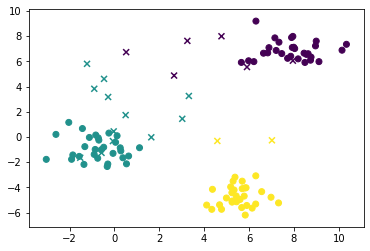

In [71]:
plt.scatter(x_test[:,0],x_test[:,1],c=predictions,marker="x")
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()